##Nesse código, aplicamos os principais indicadores de análise técnica com Python através das bibliotecas:
- Plotly - biblioteca para visualização de gráficos dinâmicos
- TALib - biblioteca que calcula os indicadores de análise técnica em um frammework amigável para programadores
- Investpy - captura de dados tratados de preço de abertura, fechamento, máxima, mímina e volume do mercado financeiro via API encapsulada em funções.

##1. Instalando Bibliotecas

O comando !pip install instala as bibliotecas e todas suas dependências

In [ ]:
!pip install ta
!pip install investpy
!pip install plotly
!pip install yfinance pandas matplotlib mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


##2. Importando bibliotecas

Nessa seção iremos importar as bibliotecas para construção das análises. Importamos também dois submódulos da biblioteca Plotly: graph objects para construção dos gráficos dinâmicos e make_subplots para quando precisarmos utilizar dois gráficos na mesma figura.

In [ ]:
import ta
import yfinance as yf
import mplfinance as mpf
import investpy
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 3. Captura de dados da ação

In [ ]:
# Definição do ticker de acordo com nomenclartura usada pelo Yahoo Finance
ticker = 'MDIA3.SA'

In [ ]:
df = yf.download(ticker , start="2024-08-01", end="2024-09-23")

[*********************100%***********************]  1 of 1 completed


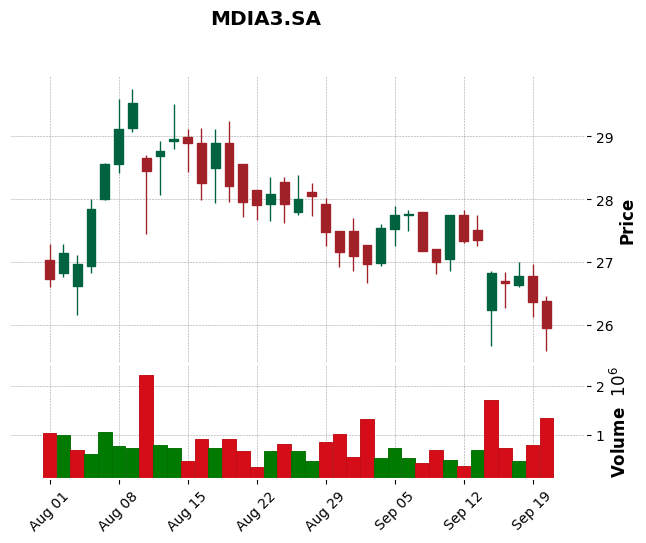

In [ ]:
# Plotar o gráfico em candlestick
mpf.plot(df, type='candle', style='charles', title=f'{ticker}', volume=True)

##4. Estrutura de programação da Plotly

###4.1. Gráficos  de linhas

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(name=f'{ticker}', x=df.index, y=df['Close']))
fig.update_layout(title_text= f'Gráfico de Linhas {ticker}',template = 'simple_white',)
fig.show()


###4.2. Gráfico de candlestick

In [ ]:
fig = go.Figure()
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text= f'Gráfico de Candlestick {ticker}', yaxis=dict(side='right'))
fig.show()

###4.3. Gráfico de barras


In [ ]:
fig = go.Figure()
fig.add_trace(go.Ohlc(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text=f'Gráfico de Barras {ticker}', yaxis=dict(side='right'))
fig.show()

##5. Indicadores

Nesta seção dividiremos em:

- Indicadores de momentum
- Indicadores de volatilidade
- Indicadores de tendência
- Indicadores de volume
- Osciladores

##5.1. Indicadores de Momentum

Momentum é um conceito da física que mede a taxa de aumento ou diminuicação de velocidade de um objeto. Na análise técnica, o mesmo conceito é aplicado aos preços buscando entender se uma tendência está em aceleração ou desaceleração.

###5.1.1. Rate of Change

In [ ]:
#Importando da biblioteca TA o indicador

from ta.momentum import ROCIndicator

In [ ]:
#Adicionando o indicador ao dataframe

roc = ROCIndicator(df['Close'])
df['ROC'] = roc.roc()

In [ ]:
#Construindo a figura do gráfico

fig = go.Figure()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='ROC',x=df.index, y=df['ROC']), row=2, col=1)
fig.add_trace(go.Candlestick(name=f'{ticker}',x=df.index, close=df['Close'], open=df['Open'],high=df['High'], low=df['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='ROC')
fig.show()

###5.1.2. Percentage Price Oscillator (PPO)

- O PPO é positivo quando a média móvel mais curta está acima da média móvel mais longa. Isso reflete um forte impulso de alta.
- O PPO é negativo quando a média móvel mais curta está abaixo da média móvel mais longa. As leituras negativas crescem quando a média móvel mais curta se distancia da média móvel mais longa (fica ainda mais negativa).
-Isso reflete um forte impulso de baixa.
-O histograma representa a diferença entre o PPO e sua EMA de 9 dias, a linha de sinal.
-O histograma é positivo quando o PPO está acima de sua EMA de 9 dias e negativo quando o PPO está abaixo de sua EMA de 9 dias. -
O PPO-Histograma pode ser usado para antecipar cruzamentos de linha de sinal no PPO

In [ ]:
from ta.momentum import PercentagePriceOscillator

In [ ]:
PPO = PercentagePriceOscillator(df['Close'])
df['PPO'] = PPO.ppo()
df['PPO_hist'] = PPO.ppo_hist()
df['PPO_line'] = PPO.ppo_signal()

In [ ]:
fig = make_subplots(rows=2, cols=1, specs =[[{"secondary_y": True}],[{"secondary_y": True}]])
fig.add_trace(go.Scatter(name='PPO', x=df.index, y=df['PPO']), row=2,col=1)
fig.add_trace(go.Bar(name='PPO_hist', x=df.index, y=df['PPO_hist']), row=2, col=1, secondary_y=True)
fig.add_trace(go.Scatter(name='PPO_line', x=df.index, y=df['PPO_line']), row=2, col=1)
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high=df['High'], low=df['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='PPO')
fig.show()

##5.2. Osciladores

Osciladores são indicadores que auxiliam a identificar se o ativo está sobrecomprado (força compradora está se esgotando) ou sobrevendido (o oposto da situação anterior onde a força vendedora está enfraquecendo).

###5.2.1. Índice de força relativa (IFR)

<p>
$ IFR = 100 - {\left(\frac{100}{1 + {\left(\frac{A}{B}\right)}}\right)} $

Onde:<p>
*A* = média dos preços dos últimos períodos de alta (usualmente fechamento e 14 períodos);<p>
*B* = média dos preços dos últimos períodos de baixa.<p>

In [ ]:
from ta.momentum import RSIIndicator


In [ ]:
#Inicializando indicador RSI

rsi = RSIIndicator(close=df['Close'],window=30)
df['RSI'] = rsi.rsi()

In [ ]:
#Gráfico Preços/RSI

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='RSI',x=df.index, y=df['RSI']), row=2, col=1)
fig.add_trace(go.Candlestick(name=f'{ticker}',x=df.index, close=df['Close'], open=df['Open'],high=df['High'], low=df['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='RSI')
fig.show()

###5.2.2. Oscilador estocástico

In [ ]:
from ta.momentum import StochasticOscillator

In [ ]:
so = StochasticOscillator(high= df['High'], low= df['Low'],close=df['Close'],window=14)
df['SO'] = so.stoch()

In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(name='SO',x=df.index, y=df['SO']), row=2, col=1)
fig.add_trace(go.Candlestick(name=f'{ticker}',x=df.index, close=df['Close'], open=df['Open'],high=df['High'], low=df['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='STOCHASTIC OSCILLATOR')
fig.show()

##5.3. Indicadores de volatilidade

###5.3.1. Bandas de Bollinger

In [ ]:
from ta.volatility import BollingerBands

In [ ]:
bb = BollingerBands(close=df['Close'], window=20, window_dev=2)
df['bb_bbm'] = bb.bollinger_mavg()
df['bb_bbh'] = bb.bollinger_hband()
df['bb_bbl'] = bb.bollinger_lband()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='MédiaMovel', x= df.index, y=df['bb_bbm']))
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.add_trace(go.Scatter(name='Banda Superior', x=df.index, y=df['bb_bbh']))
fig.add_trace(go.Scatter(name='Banda inferior', x=df.index, y=df['bb_bbl']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='Bollinger Bands')
fig.show()

###5.3.2. ATR - Average True Range

In [ ]:
from ta.volatility import AverageTrueRange

In [ ]:
atr = AverageTrueRange(df['High'], df['Low'], df['Close'])

df['ATR'] = atr.average_true_range()

In [ ]:
fig = make_subplots(rows=2,cols=1)
fig.add_trace(go.Scatter(name='ATR', x=df.index, y=df['ATR']), row=2, col=1)
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text = 'ATR')
fig.show()

#5.4. Indicadores de tendência

Indicadores de tendência buscam captar sinais de um movimento direcional do preço do ativo

###5.4.1. MACD

In [ ]:
from ta.trend import MACD

In [ ]:
macd = MACD(df['Close'])
df['MACD_LINE'] = macd.macd()
df['MACD_DIFF'] = macd.macd_diff()


In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(name='MACD', x=df.index, y=df['MACD_LINE']), row=2,col=1)
fig.add_trace(go.Scatter(name='MACD_DIFF', x=df.index, y=df['MACD_DIFF']), row=2, col=1)
fig.add_trace(go.Scatter(name='MACD_line', x=df.index, y=df['MACD_LINE']), row=2, col=1)
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']),row=1,col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='MACD')
fig.show()

###5.4.2. Simple Moving Average

In [ ]:
from ta.trend import SMAIndicator

In [ ]:
sma_short = SMAIndicator(df['Close'], window=5)
sma_long = SMAIndicator(df['Close'], window=30)
df['SMA_SHORT'] = sma_short.sma_indicator()
df['SMA_LONG'] = sma_long.sma_indicator()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(name='SMA_SHORT', x=df.index, y=df['SMA_SHORT']))
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.add_trace(go.Scatter(name='SMA_LONG', x=df.index, y=df['SMA_LONG']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='Simple Moving Average')
fig.show()

###5.4.3. Média Móvel Exponencial - EMA

In [ ]:
from ta.trend import EMAIndicator

In [ ]:
ema_short = EMAIndicator(df['Close'], window=5)
ema_long = EMAIndicator(df['Close'], window=30)
df['EMA_SHORT'] = ema_short.ema_indicator()
df['EMA_LONG'] = ema_long.ema_indicator()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(name='EMA_SHORT', x=df.index, y=df['EMA_SHORT']))
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high = df['High'], low=df['Low']))
fig.add_trace(go.Scatter(name='EMA_LONG', x=df.index, y=df['EMA_LONG']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='EMA')
fig.show()

##5.5. Indicadores de Volume
Indicadores de volume baseiam-se na quantidade negociada buscando compreender como as forças vendedoras e compradoras influenciam no preço

###5.5.1. OBV - On Balance Volume

In [ ]:
from ta.volume import OnBalanceVolumeIndicator

In [ ]:
obv = OnBalanceVolumeIndicator(df['Close'], df['Volume'])
df['OBV'] = obv.on_balance_volume()

In [ ]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Bar(name='OBV', x=df.index, y=df['OBV']), row=2, col=1)
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high=df['High'], low=df['Low']), row=1, col=1)
fig.update_layout(xaxis_rangeslider_visible=False, title_text='OBV')
fig.show()

###5.5.2. VWAP - Volume Weighted Average Price

In [ ]:
from ta.volume import VolumeWeightedAveragePrice

In [ ]:
vwap = VolumeWeightedAveragePrice(df['High'], df['Low'], df['Close'], df['Volume'])
df['VWAP'] = vwap.volume_weighted_average_price()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(name='VWAP', x=df.index, y=df['VWAP']))
fig.add_trace(go.Candlestick(name=f'{ticker}', x=df.index, close=df['Close'], open=df['Open'], high=df['High'], low=df['Low']))
fig.update_layout(xaxis_rangeslider_visible=False, title_text='VWAP')
fig.show()